In [1]:
from __future__ import print_function

import numpy as np
import keras

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [6]:
batch_size = 32
num_classes = 10
epochs = 5

# input image dimensions
img_rows, img_cols = 28, 28

In [7]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax', name='preds'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 53s 885us/step - loss: 0.1930 - acc: 0.9420 - val_loss: 0.0460 - val_acc: 0.9850
Epoch 2/5
60000/60000 [==============================] - 51s 858us/step - loss: 0.0820 - acc: 0.9752 - val_loss: 0.0327 - val_acc: 0.9902
Epoch 3/5
60000/60000 [==============================] - 51s 855us/step - loss: 0.0613 - acc: 0.9816 - val_loss: 0.0289 - val_acc: 0.9902
Epoch 4/5
60000/60000 [==============================] - 52s 867us/step - loss: 0.0498 - acc: 0.9849 - val_loss: 0.0291 - val_acc: 0.9902
Epoch 5/5
60000/60000 [==============================] - 53s 878us/step - loss: 0.0430 - acc: 0.9863 - val_loss: 0.0304 - val_acc: 0.9898
Test loss: 0.030418207042911673
Test accuracy: 0.9898


In [11]:
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations
from matplotlib import pyplot as plt

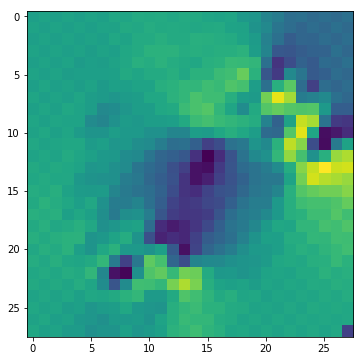

In [12]:
plt.rcParams['figure.figsize'] = (18, 6)
layer_idx = utils.find_layer_idx(model, 'preds')

model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

filter_idx = 0
img = visualize_activation(model, layer_idx, filter_indices=filter_idx)
plt.imshow(img[..., 0])


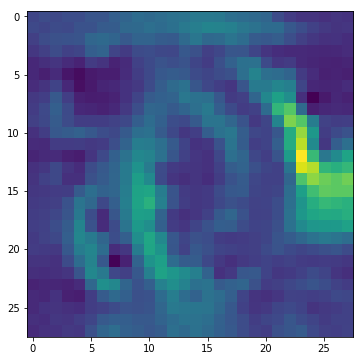

In [13]:
img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.))
plt.imshow(img[..., 0])

Iteration: 1, named_losses: [('ActivationMax Loss', -0.18972382),
 ('L-6.0 Norm Loss', 0.019830175),
 ('TV(2.0) Loss', 0.09227365)], overall loss: -0.0776199996471405
Iteration: 2, named_losses: [('ActivationMax Loss', -19.709595),
 ('L-6.0 Norm Loss', 0.17230073),
 ('TV(2.0) Loss', 506.37036)], overall loss: 486.83306884765625
Iteration: 3, named_losses: [('ActivationMax Loss', -191.72392),
 ('L-6.0 Norm Loss', 0.211106),
 ('TV(2.0) Loss', 248.13518)], overall loss: 56.62236022949219
Iteration: 4, named_losses: [('ActivationMax Loss', -348.2898),
 ('L-6.0 Norm Loss', 0.2215229),
 ('TV(2.0) Loss', 242.38863)], overall loss: -105.67964172363281
Iteration: 5, named_losses: [('ActivationMax Loss', -444.8183),
 ('L-6.0 Norm Loss', 0.25158167),
 ('TV(2.0) Loss', 257.9526)], overall loss: -186.61410522460938
Iteration: 6, named_losses: [('ActivationMax Loss', -542.0057),
 ('L-6.0 Norm Loss', 0.27397844),
 ('TV(2.0) Loss', 274.62436)], overall loss: -267.1073303222656
Iteration: 7, named_loss

Iteration: 64, named_losses: [('ActivationMax Loss', -1656.3108),
 ('L-6.0 Norm Loss', 0.7652301),
 ('TV(2.0) Loss', 823.73517)], overall loss: -831.8103637695312
Iteration: 65, named_losses: [('ActivationMax Loss', -1652.0842),
 ('L-6.0 Norm Loss', 0.76599056),
 ('TV(2.0) Loss', 824.66223)], overall loss: -826.656005859375
Iteration: 66, named_losses: [('ActivationMax Loss', -1670.4197),
 ('L-6.0 Norm Loss', 0.7703639),
 ('TV(2.0) Loss', 835.565)], overall loss: -834.0842895507812
Iteration: 67, named_losses: [('ActivationMax Loss', -1675.1886),
 ('L-6.0 Norm Loss', 0.7741746),
 ('TV(2.0) Loss', 842.3866)], overall loss: -832.02783203125
Iteration: 68, named_losses: [('ActivationMax Loss', -1680.6672),
 ('L-6.0 Norm Loss', 0.7813558),
 ('TV(2.0) Loss', 840.5312)], overall loss: -839.3546752929688
Iteration: 69, named_losses: [('ActivationMax Loss', -1691.8109),
 ('L-6.0 Norm Loss', 0.77851063),
 ('TV(2.0) Loss', 846.7051)], overall loss: -844.3272705078125
Iteration: 70, named_losses:

Iteration: 127, named_losses: [('ActivationMax Loss', -1869.9948),
 ('L-6.0 Norm Loss', 0.92687964),
 ('TV(2.0) Loss', 952.8888)], overall loss: -916.1790771484375
Iteration: 128, named_losses: [('ActivationMax Loss', -1864.4044),
 ('L-6.0 Norm Loss', 0.9288578),
 ('TV(2.0) Loss', 953.3738)], overall loss: -910.101806640625
Iteration: 129, named_losses: [('ActivationMax Loss', -1872.9127),
 ('L-6.0 Norm Loss', 0.92941916),
 ('TV(2.0) Loss', 960.4665)], overall loss: -911.5167846679688
Iteration: 130, named_losses: [('ActivationMax Loss', -1869.926),
 ('L-6.0 Norm Loss', 0.927937),
 ('TV(2.0) Loss', 958.2591)], overall loss: -910.7389526367188
Iteration: 131, named_losses: [('ActivationMax Loss', -1868.5786),
 ('L-6.0 Norm Loss', 0.9293649),
 ('TV(2.0) Loss', 954.63385)], overall loss: -913.0154418945312
Iteration: 132, named_losses: [('ActivationMax Loss', -1873.5936),
 ('L-6.0 Norm Loss', 0.9307053),
 ('TV(2.0) Loss', 962.1178)], overall loss: -910.545166015625
Iteration: 133, named_l

Iteration: 191, named_losses: [('ActivationMax Loss', -1893.9462),
 ('L-6.0 Norm Loss', 0.98149383),
 ('TV(2.0) Loss', 971.64496)], overall loss: -921.3197631835938
Iteration: 192, named_losses: [('ActivationMax Loss', -1894.225),
 ('L-6.0 Norm Loss', 0.98431253),
 ('TV(2.0) Loss', 975.4686)], overall loss: -917.7720947265625
Iteration: 193, named_losses: [('ActivationMax Loss', -1897.0284),
 ('L-6.0 Norm Loss', 0.98336595),
 ('TV(2.0) Loss', 973.9409)], overall loss: -922.1041259765625
Iteration: 194, named_losses: [('ActivationMax Loss', -1898.3524),
 ('L-6.0 Norm Loss', 0.98418456),
 ('TV(2.0) Loss', 977.2099)], overall loss: -920.1583862304688
Iteration: 195, named_losses: [('ActivationMax Loss', -1898.7512),
 ('L-6.0 Norm Loss', 0.9868499),
 ('TV(2.0) Loss', 977.3742)], overall loss: -920.3901977539062
Iteration: 196, named_losses: [('ActivationMax Loss', -1890.0149),
 ('L-6.0 Norm Loss', 0.98287946),
 ('TV(2.0) Loss', 971.3797)], overall loss: -917.6522827148438
Iteration: 197, n

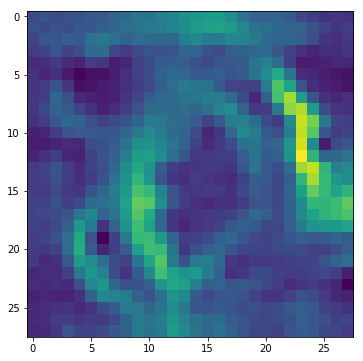

In [14]:
img = visualize_activation(model, layer_idx,
                           filter_indices=filter_idx, input_range=(0., 1.),
                           verbose=True)
plt.imshow(img[..., 0])

Iteration: 1, named_losses: [('ActivationMax Loss', -0.16671005)], overall loss: -0.1667100489139557
Iteration: 2, named_losses: [('ActivationMax Loss', -22.02098)], overall loss: -22.020980834960938
Iteration: 3, named_losses: [('ActivationMax Loss', -193.602)], overall loss: -193.6020050048828
Iteration: 4, named_losses: [('ActivationMax Loss', -508.22476)], overall loss: -508.2247619628906
Iteration: 5, named_losses: [('ActivationMax Loss', -790.79694)], overall loss: -790.7969360351562
Iteration: 6, named_losses: [('ActivationMax Loss', -1054.7428)], overall loss: -1054.7427978515625
Iteration: 7, named_losses: [('ActivationMax Loss', -1288.8789)], overall loss: -1288.87890625
Iteration: 8, named_losses: [('ActivationMax Loss', -1501.6378)], overall loss: -1501.6378173828125
Iteration: 9, named_losses: [('ActivationMax Loss', -1729.4481)], overall loss: -1729.4481201171875
Iteration: 10, named_losses: [('ActivationMax Loss', -1930.3711)], overall loss: -1930.37109375
Iteration: 11,

Iteration: 133, named_losses: [('ActivationMax Loss', -17070.293)], overall loss: -17070.29296875
Iteration: 134, named_losses: [('ActivationMax Loss', -17179.488)], overall loss: -17179.48828125
Iteration: 135, named_losses: [('ActivationMax Loss', -17298.895)], overall loss: -17298.89453125
Iteration: 136, named_losses: [('ActivationMax Loss', -17416.81)], overall loss: -17416.810546875
Iteration: 137, named_losses: [('ActivationMax Loss', -17525.514)], overall loss: -17525.513671875
Iteration: 138, named_losses: [('ActivationMax Loss', -17647.482)], overall loss: -17647.482421875
Iteration: 139, named_losses: [('ActivationMax Loss', -17763.643)], overall loss: -17763.642578125
Iteration: 140, named_losses: [('ActivationMax Loss', -17878.928)], overall loss: -17878.927734375
Iteration: 141, named_losses: [('ActivationMax Loss', -17997.723)], overall loss: -17997.72265625
Iteration: 142, named_losses: [('ActivationMax Loss', -18117.025)], overall loss: -18117.025390625
Iteration: 143,

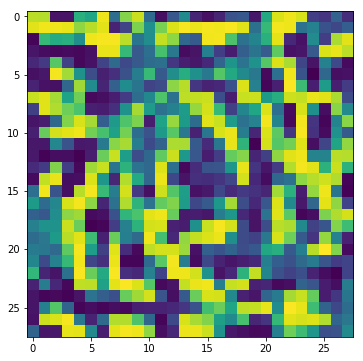

In [15]:
img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.), 
                           tv_weight=0., lp_norm_weight=0., verbose=True)
plt.imshow(img[..., 0])

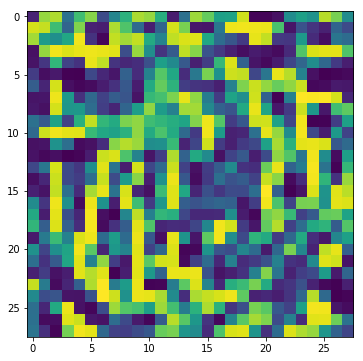

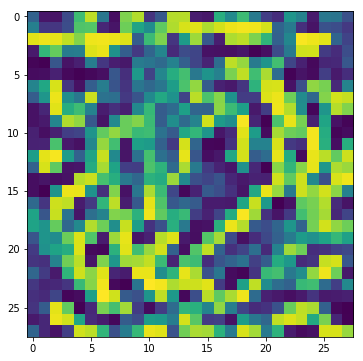

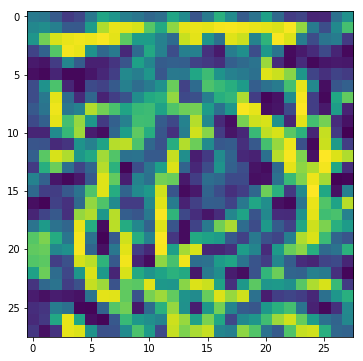

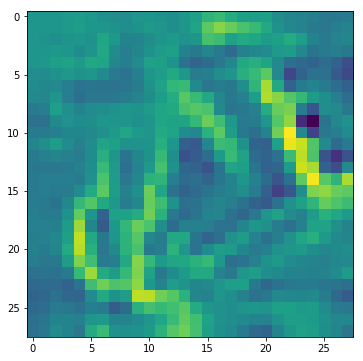

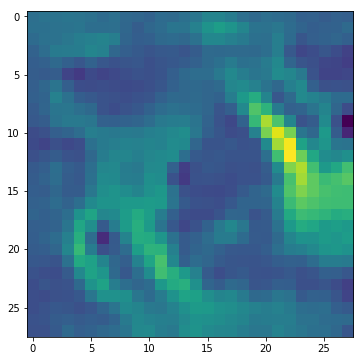

In [16]:
for tv_weight in [1e-3, 1e-2, 1e-1, 1, 10]:
    img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.), 
                               tv_weight=tv_weight, lp_norm_weight=0.)
    plt.figure()
    plt.imshow(img[..., 0])

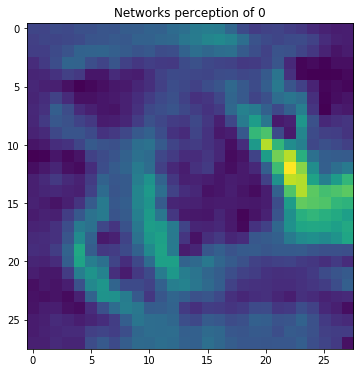

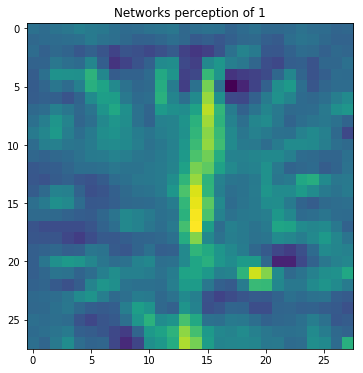

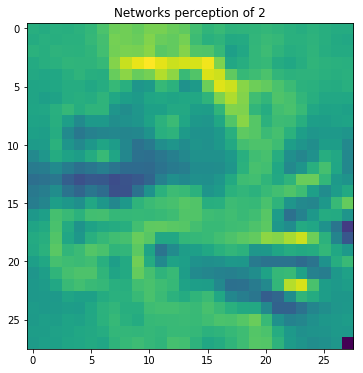

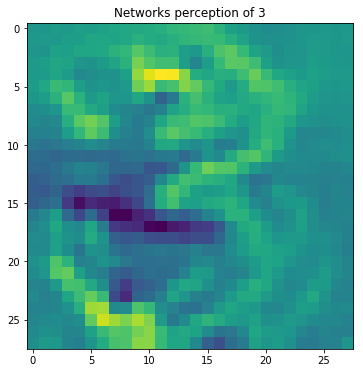

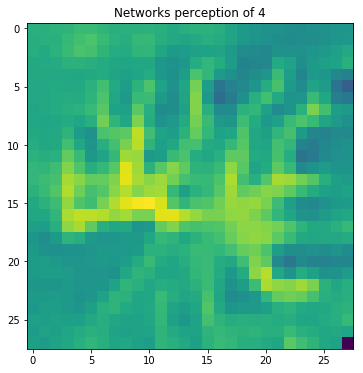

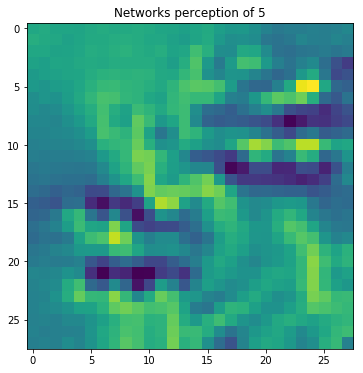

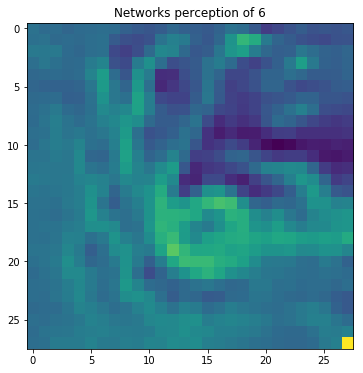

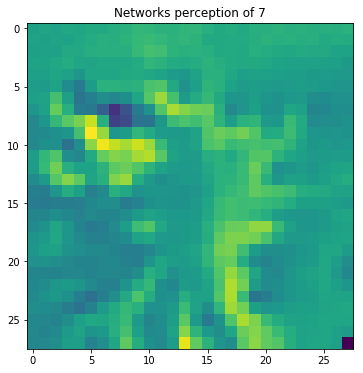

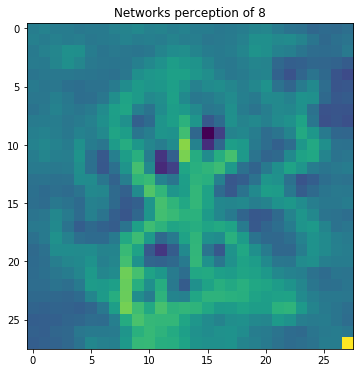

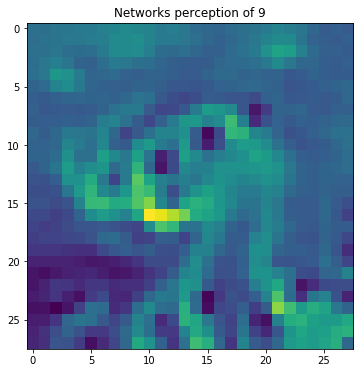

In [17]:
for output_idx in np.arange(10):
    img = visualize_activation(model, layer_idx, filter_indices=output_idx, input_range=(0., 1.))
    plt.figure()
    plt.title('Networks perception of {}'.format(output_idx))
    plt.imshow(img[..., 0])

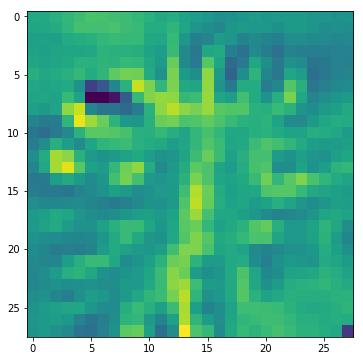

In [18]:
img = visualize_activation(model, layer_idx, filter_indices=[1, 7], input_range=(0., 1.))
plt.imshow(img[..., 0])

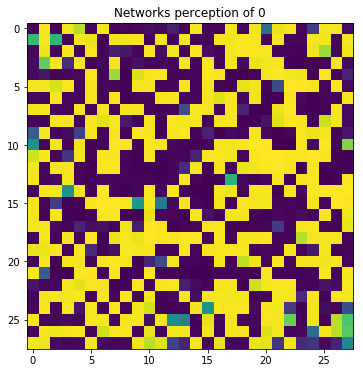

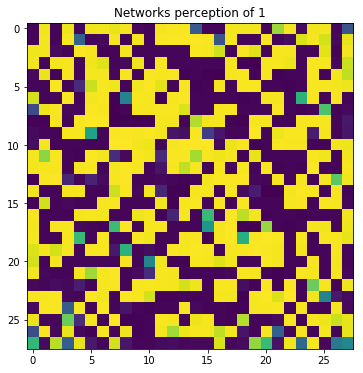

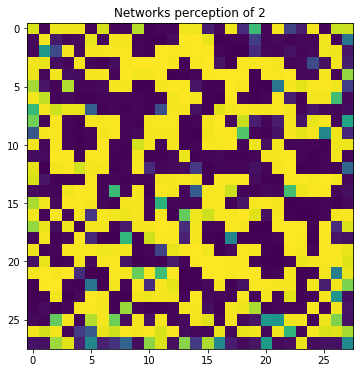

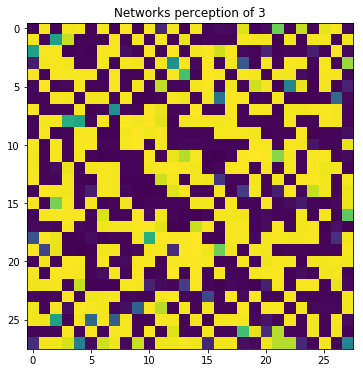

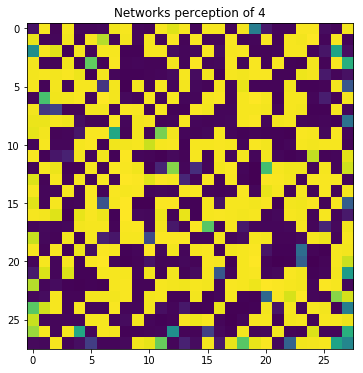

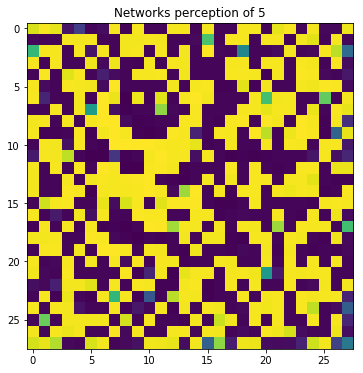

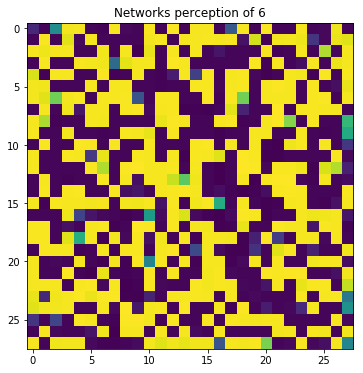

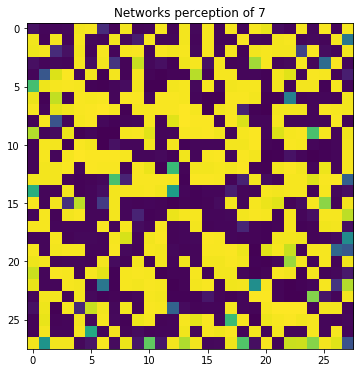

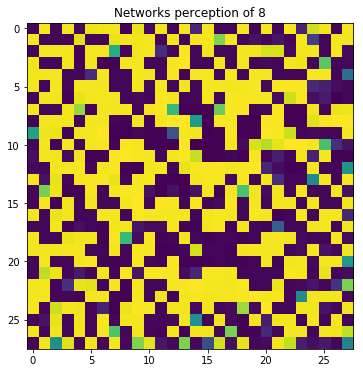

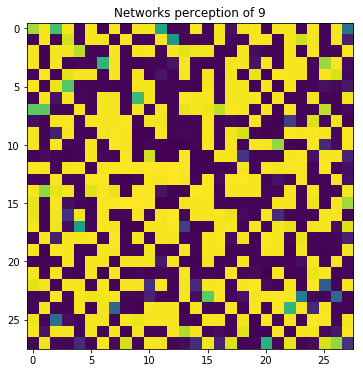

In [19]:
model.layers[layer_idx].activation = activations.softmax
model = utils.apply_modifications(model)

for output_idx in np.arange(10):
    img = visualize_activation(model, layer_idx, filter_indices=output_idx, input_range=(0., 1.))
    plt.figure()
    plt.title('Networks perception of {}'.format(output_idx))
    plt.imshow(img[..., 0])